# 0.0 - Imports

In [1]:
import time
import warnings

import numpy as np
import pandas as pd
from IPython import display
from matplotlib import pyplot as plt
from sklearn import metrics as mt
from sklearn.cluster import AffinityPropagation
from sklearn.decomposition import PCA

In [2]:
warnings.filterwarnings("ignore")

# 1.0 - Load Data

In [3]:
X = pd.read_csv("../data/clustering_X_dataset.csv")

# 2.0 - Affinity Propagation

## Parameters
- `Preference`

## 2.1 - Hyperparameter Fine Tuning

In [4]:
# Testing parameters
p = np.arange(-100, -141, -1)

ss_list = []
k_list = []

best_p = 0
best_k = 0
best_ss = 0

for i in range(len(p)):
    # Model definition
    affinity_prop = AffinityPropagation(preference=p[i])

    # Model Training
    affinity_prop.fit(X)

    # Predict
    labels = affinity_prop.labels_

    # Performance
    ss = mt.silhouette_score(X, labels)
    ss_list.append(ss)
    k_list.append(len(affinity_prop.cluster_centers_indices_))

    # Print best K and best preference
    display.clear_output(wait=True)
    time.sleep(0.2)

    best_p = p[np.argmax(ss_list)]
    best_k = k_list[np.argmax(ss_list)]
    best_ss = np.round(max(ss_list), 3)

    print(f"Preference: {p[i]}")
    print(f"Best Preference Value: {best_p}")
    print(f"Best Number of Clusters: {best_k}")
    print(f"Best Silhouette Score: {best_ss}")

Preference: -140
Best Preference Value: -133
Best Number of Clusters: 3
Best Silhouette Score: 0.205


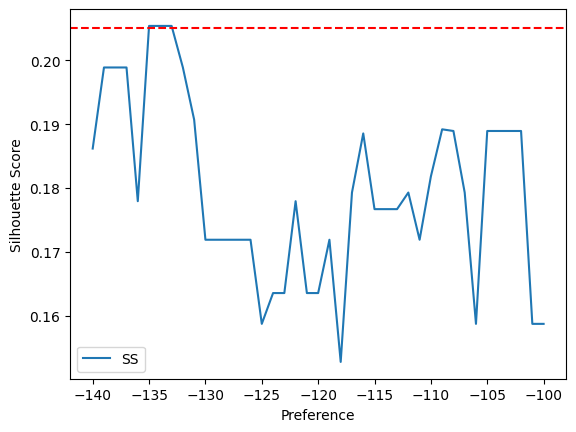

In [5]:
plt.plot(p, ss_list, label="SS")
plt.axhline(y=best_ss, color="r", linestyle="--")
plt.xlabel("Preference")
plt.ylabel("Silhouette Score")
plt.legend()

## 2.2 - PCA

Text(0.5, 1.0, 'Affinity Propagation')

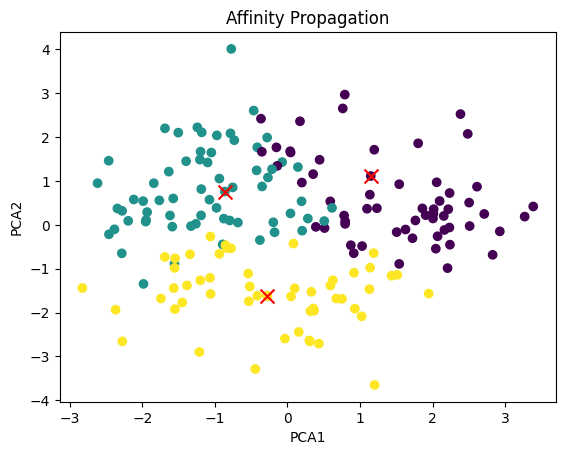

In [6]:
# Reduce X
pca = PCA(n_components=2)
reduced_X = pca.fit_transform(X)
reduced_X = pd.DataFrame(data=reduced_X, columns=["PC1", "PC2"])
reduced_X.head()

# reduced centers
centers = pca.transform(affinity_prop.cluster_centers_)
centers

# Scatter Plot
plt.scatter(reduced_X["PC1"], reduced_X["PC2"], c=affinity_prop.labels_)
plt.scatter(centers[:, 0], centers[:, 1], marker="x", s=100, c="red")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("Affinity Propagation")

# 3.0 - Save Results

In [7]:
train_metrics = {
    "Algorithm": "Affinity Propagation",
    "N Clusters": best_k,
    "Average Silhouette Score": best_ss,
}

pd.DataFrame(train_metrics, index=[0]).to_csv(
    "./clustering_metrics.csv", mode="a", header=False
)